# Week 2: Implementing Callbacks in TensorFlow using the MNIST Dataset

In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy and stops once this threshold is achieved. In the lecture you saw how this was done for the loss but here you will be using accuracy instead.

Some notes:
1. Your network should succeed in less than 9 epochs.
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!" and stop training.
3. If you add any additional variables, make sure you use the same names as the ones used in the class. This is important for the function signatures (the parameters and names) of the callbacks.

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
data_path = "/kaggle/input/digit-recognizer/train.csv"
data_path_test = "/kaggle/input/digit-recognizer/test.csv"
data_set = pd.read_csv(data_path)
data_set_test = pd.read_csv(data_path_test)

(x_train, y_train) = data_set.iloc[:,1:], data_set.iloc[:,0]
x_test = data_set_test.iloc[:,:]/255
x_train = x_train / 255.0

pd.DataFrame(x_train)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now take a look at the shape of the training data:

In [21]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
x_test.iloc[0,:]

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Name: 0, Length: 784, dtype: float64

In [23]:
data_shape = y_train.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape})")

There are 42000 examples with shape ((42000,))


In [24]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Defining your callback

Now it is time to create your own custom callback. For this complete the `myCallback` class and the `on_epoch_end` method in the cell below. If you need some guidance on how to proceed, check out this [link](https://www.tensorflow.org/guide/keras/custom_callback).

In [25]:
# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epochs, logs={}):
            if logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

### END CODE HERE


## Create and train your model

Now that you have defined your callback it is time to complete the `train_mnist` function below. 

**You must set your model to train for 10 epochs and the callback should fire before the 9th epoch for you to pass this assignment.**

**Hint:**
- Feel free to try the architecture for the neural network that you see fit but in case you need extra help you can check out an architecture that works pretty well at the end of this notebook.

In [64]:

    callbacks = myCallback()
    
    # Define the model
    model = tf.keras.models.Sequential([ 
        
        tf.keras.layers.Dense(128,activation = tf.keras.activations.relu),
        tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
    ]) 

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
#     model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2919 - accuracy: 0.9165
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1322 - accuracy: 0.9612
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0902 - accuracy: 0.9733
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0679 - accuracy: 0.9792
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0517 - accuracy: 0.9840
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0394 - accuracy: 0.9879
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0318 - accuracy: 0.9905
Epoch 8/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 9/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0191 - accuracy: 0.9947
Epoch 10/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.016

## Predicting Test set:

In [65]:
print("Predictinf x_test...")
prediction = model.predict(x_test)

Predictinf x_test...
875/875 [==============================] - 1s 1ms/step


## Choose index to check prediction on various index

Classification:  7


Text(0.5, 1.0, 'Actual Image')

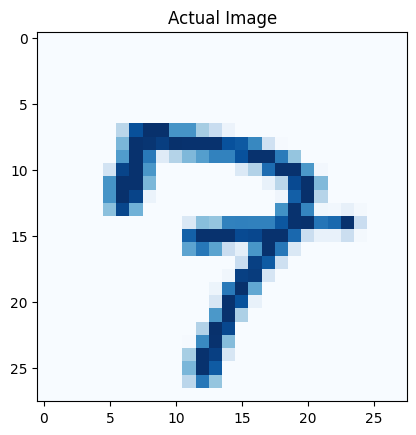

In [67]:
index = 5
print("Classification: ",prediction[index].argmax())

x_test_numpy = x_test.iloc[index,:].to_numpy(dtype = 'float64')
pixels = x_test_numpy.reshape((28,28))*255
plt.imshow(pixels, cmap = 'Blues')
plt.title("Actual Image")

## Need more help?

Run the following cell to see an architecture that works well for the problem at hand:

In [ ]:
# WE STRONGLY RECOMMEND YOU TO TRY YOUR OWN ARCHITECTURES FIRST
# AND ONLY RUN THIS CELL IF YOU WISH TO SEE AN ANSWER

import base64

encoded_answer = "CiAgIC0gQSBGbGF0dGVuIGxheWVyIHRoYXQgcmVjZWl2ZXMgaW5wdXRzIHdpdGggdGhlIHNhbWUgc2hhcGUgYXMgdGhlIGltYWdlcwogICAtIEEgRGVuc2UgbGF5ZXIgd2l0aCA1MTIgdW5pdHMgYW5kIFJlTFUgYWN0aXZhdGlvbiBmdW5jdGlvbgogICAtIEEgRGVuc2UgbGF5ZXIgd2l0aCAxMCB1bml0cyBhbmQgc29mdG1heCBhY3RpdmF0aW9uIGZ1bmN0aW9uCg=="
encoded_answer = encoded_answer.encode('ascii')
answer = base64.b64decode(encoded_answer)
answer = answer.decode('ascii')

print(answer)

**Congratulations on finishing this week's assignment!**

You have successfully implemented a callback that gives you more control over the training loop for your model. Nice job!

**Keep it up!**